# Machile Learning in Computational Biology
## Course Project
# Clustering notebook (replication of authors results)
#### Papadopoulou Marianna, ID:7115152200032
#### Vossos Charalampos, ID:7115152200037
#### Fillipidou Thalassini-Marina, ID:7115152200022

This notebook presents the attemps of the authors' results replication. 
of cells based on their gene profile.
In order to replicate the findings outlined in this academic document, please follow the steps below:

1.	Open the notebook provided using Google Colab 
2.	Access the data section of the environment by clicking on the folder icon located on the left side. 
Then, upload the:
  - final_data.csv file <br>
  or the files
  - E-MTAB-6108.aggregated_filtered_normalised_counts.mtx_cols
  - E-MTAB-6108.aggregated_filtered_normalised_counts.mtx_rows
  - E-MTAB-6108.aggregated_filtered_normalised_counts.mtx<br>
  AND 
  - ground_truth.xlsx

 These files are provided within the exercise's zip file. To upload them, simply drag and drop the files into the designated area.

3. Run the cells in the notebook in the order they appear, making sure to follow the instructions provided in each cell.
	 
When executing the notebook in Jupyter, it is essential to ensure that the necessary packages have been installed. Additionally, it is important to specify the path to the dataset (final_data.csv or other three files) as an input parameter for the *pd.read_csv()* functions.

# Libraries

In [ ]:
# Use if opened in Colab
#!pip install umap-learn
#!pip install anndata
#!pip install scanpy
#!pip install optuna

In [3]:
import os
import optuna
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import AgglomerativeClustering

# Replicate Results


# Load the dataset

In [4]:
# open file and read its content
with open("/content/E-MTAB-6108.aggregated_filtered_normalised_counts.mtx") as f:
    lines = f.readlines()

In [5]:
# Create an empty dictionary 'normalized_counts_mtx' with three lists as values: "gene", "cell", and "counts".
# These lists will be populated with data from the file 'E-MTAB-6108.aggregated_filtered_normalised_counts.mtx'.
normalized_counts_mtx = {"gene": [], "cell": [], "counts": []}

# Loop through each line in the 'lines' list starting from the third line (skipping the header).
# Each line in the file represents a gene, cell, and its corresponding count.
for line in lines[2:]:
    normalized_counts_mtx["gene"].append(line.split()[0])
    normalized_counts_mtx["cell"].append(line.split()[1])
    normalized_counts_mtx["counts"].append(line.split()[2])

normalized_counts_mtx = pd.DataFrame(normalized_counts_mtx).astype(float) # Convert the 'normalized_counts_mtx' dictionary into a Pandas DataFrame and convert the 'counts' column to float type.

In [6]:
# Find the number of columns (genes) and rows (cells) present in the 'normalized_counts_mtx' DataFrame.
# This information will be used to initialize an empty matrix for storing counts.
cols= int(normalized_counts_mtx["gene"].max())
rows = int(normalized_counts_mtx["cell"].max())
matrix = np.zeros((rows, cols)) # Initialize an empty matrix of size (rows, cols)

# Loop through each row in the 'normalized_counts_mtx' DataFrame.
for i in range(normalized_counts_mtx.shape[0]):
    # Retrieve the gene index and cell index (zero-based) for each row in the DataFrame.
    gene = int(normalized_counts_mtx.loc[i, "gene"]) - 1
    cell = int(normalized_counts_mtx.loc[i, "cell"]) - 1
    counts = normalized_counts_mtx.loc[i, "counts"]
    # Assign the counts value to the corresponding position in the 'matrix' (cell, gene).
    matrix[cell, gene] = counts


In [7]:
df = pd.DataFrame(matrix)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,19585,19586,19587,19588,19589,19590,19591,19592,19593,19594
0,122.99367,0.0,0.000000,0.0,0.00000,0.0,0.000000,30.748417,0.000000,61.496834,...,15.374208,0.0,0.0,0.000000,0.0,61.496834,0.0,0.0,0.000000,0.0
1,215.19258,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,215.192580,0.0,215.192580,0.0,0.0,0.000000,0.0
2,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,35.371310,...,0.000000,0.0,0.0,35.371310,0.0,53.056970,0.0,0.0,0.000000,0.0
3,0.00000,0.0,65.466450,0.0,0.00000,0.0,32.733227,0.000000,65.466450,0.000000,...,0.000000,0.0,0.0,130.932900,0.0,98.199680,0.0,0.0,0.000000,0.0
4,168.26047,0.0,0.000000,0.0,0.00000,0.0,56.086823,0.000000,56.086823,0.000000,...,0.000000,0.0,0.0,112.173645,0.0,448.694580,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,142.694060,0.0,0.0,0.000000,0.0
1423,0.00000,0.0,172.205950,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,86.102974,0.0,0.0,0.000000,0.0
1424,220.29666,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,146.864440,0.0,110.148330,0.0,0.0,36.716110,0.0
1425,0.00000,0.0,55.496975,0.0,0.00000,0.0,0.000000,277.484860,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,83.245460,0.0,0.0,0.000000,0.0


In [9]:
# Read gene names from the corresponding file
genes = []
with open("/content/E-MTAB-6108.aggregated_filtered_normalised_counts.mtx_rows") as f:
    lines = f.readlines()
for line in lines:
    genes.append(line.split()[0])
df.columns = genes # Assign the gene names as column names in the 'df' DataFrame.

In [10]:
# Read cell names from the corrsponding file.
with open("/content/E-MTAB-6108.aggregated_filtered_normalised_counts.mtx_cols") as f:
    lines = f.readlines()

df.insert(loc=0, column='cell', value=lines) # Add the cell names as the first column in the 'df' DataFrame
df["cell"] = df["cell"].str.rstrip("\n") # Remove the newline character from the 'cell' column values in the 'df' DataFrame.

In [11]:
df

,cell,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000289517,ENSG00000289565,ENSG00000289604,ENSG00000289685,ENSG00000289690,ENSG00000289694,ENSG00000289697,ENSG00000289700,ENSG00000289701,ENSG00000289716
0,ERR2538859-AAACCTGAGACCACGA,122.99367,0.0,0.000000,0.0,0.00000,0.0,0.000000,30.748417,0.000000,...,15.374208,0.0,0.0,0.000000,0.0,61.496834,0.0,0.0,0.000000,0.0
1,ERR2538859-AAACCTGTCTGATACG,215.19258,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,215.192580,0.0,215.192580,0.0,0.0,0.000000,0.0
2,ERR2538859-AAACGGGAGTGTTGAA,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,35.371310,0.0,53.056970,0.0,0.0,0.000000,0.0
3,ERR2538859-AAAGATGTCCGAACGC,0.00000,0.0,65.466450,0.0,0.00000,0.0,32.733227,0.000000,65.466450,...,0.000000,0.0,0.0,130.932900,0.0,98.199680,0.0,0.0,0.000000,0.0
4,ERR2538859-AAAGTAGGTTAGTGGG,168.26047,0.0,0.000000,0.0,0.00000,0.0,56.086823,0.000000,56.086823,...,0.000000,0.0,0.0,112.173645,0.0,448.694580,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,ERR2538860-TTTGGTTTCGTTACGA,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,142.694060,0.0,0.0,0.000000,0.0
1423,ERR2538860-TTTGTCAAGCCCAACC,0.00000,0.0,172.205950,0.0,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,86.102974,0.0,0.0,0.000000,0.0
1424,ERR2538860-TTTGTCACATTGGGCC,220.29666,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,146.864440,0.0,110.148330,0.0,0.0,36.716110,0.0
1425,ERR2538860-TTTGTCAGTTGCGTTA,0.00000,0.0,55.496975,0.0,0.00000,0.0,0.000000,277.484860,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,83.245460,0.0,0.0,0.000000,0.0


## Adding ground truth labels from clustering results


In [ ]:
# Create an empty DataFrame named 'final_data' to store the final processed data.
final_data = pd.DataFrame({})

# Read the ground truth data from the Excel file 'ground_truth.xlsx' and store it in a DataFrame named 'ground_truth'.
ground_truth = pd.read_excel("/content/ground_truth.xlsx")

temp_df = pd.DataFrame({})

# Loop through each column in the 'ground_truth' DataFrame, starting from the third column.
# Each column represents a different cell (e.g., 'column' corresponds to the cell name).
for number, column in enumerate(ground_truth.columns[2:]):
    df_clusters = pd.DataFrame({})

    # Extract a subset of the original DataFrame 'df' where the 'cell' column matches the current cell (column).
    temp_df = pd.DataFrame(df[df["cell"] == column])

    # Iterate through each row in the 'ground_truth' DataFrame.
    # 'ground_truth.loc[i, "K"]' contains the number of clusters for the current row (index 'i').
    # This number represents the number of clusters used in a certain split given by the row index 'i'.
    for i in range(ground_truth.shape[0]):

        # Get the number of clusters for the current row (index 'i').
        number_of_clusters = ground_truth.loc[i, "K"]

        # Assign the value from the 'ground_truth' DataFrame to a new column in 'temp_df' with a name like "cluster_2".
        # The name is generated using the format "cluster_number_of_clusters".
        # This column will contain the cluster label that the cell (column) belongs to for a certain split given by index 'i'.
        temp_df["cluster_{}".format(number_of_clusters)] = ground_truth.loc[i, column]

    # Concatenate the 'temp_df' DataFrame to the 'final_data' DataFrame, adding data for the current cell (column) and clusters.
    final_data = pd.concat([final_data, temp_df])

In [ ]:
# Calculate the variance across cells for each gene
variances = final_data.iloc[:, 1:-9].var(axis=0)

# Sort the genes based on variance in descending order and select the top 1,500 genes
top_genes = variances.sort_values(ascending=False).index[:1500]

# Get the last columns from the original DataFrame
last_columns = final_data.iloc[:, -9:]

# Filter the DataFrame to keep only the top 1,500 genes and the last columns
df_filtered = pd.concat([final_data[['cell'] + list(top_genes)], last_columns], axis=1)

# Optionally, you can reset the index of the filtered DataFrame
df_filtered.reset_index(drop=True, inplace=True)

# Load from csv (already filtered and reduced to 1500 most variant genes)

In [4]:
df_original = pd.read_csv("content/final_df.csv")

In [5]:
df_original

,cell,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,...,ENSG00000185565,cluster_2,cluster_4,cluster_7,cluster_8,cluster_11,cluster_18,cluster_23,cluster_31,cluster_37
0,ERR2538859-AAACCTGAGACCACGA,32962.305,9065.20200,8240.5760,5350.2246,4735.2563,5042.7400,4950.4950,9255.0700,3659.0615,...,0.00000,1,3,3,3,2,2,19,17,12
1,ERR2538859-AAACCTGTCTGATACG,34861.200,0.00000,5579.0670,0.0000,16139.4430,4519.0444,3873.4666,12696.3620,3443.0813,...,0.00000,2,2,6,7,7,3,6,6,1
2,ERR2538859-AAACGGGAGTGTTGAA,17791.770,9193.14500,4845.0840,3431.0170,13334.9840,4739.7560,1061.1393,14643.7230,2193.0212,...,70.74262,1,1,1,1,1,14,14,26,26
3,ERR2538859-AAAGATGTCCGAACGC,26513.914,10016.36700,7070.3770,5564.6484,10540.0990,4058.9202,3404.2556,7725.0415,8837.9720,...,65.46645,1,4,5,5,10,18,22,28,33
4,ERR2538859-AAAGTAGGTTAGTGGG,30791.666,18116.04300,7291.2870,7347.3735,5664.7690,5384.3350,2636.0806,8469.1100,3140.8620,...,0.00000,1,4,4,6,5,7,20,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,ERR2538860-TTTGGTTTCGTTACGA,20833.332,11986.30100,5707.7627,6849.3150,6563.9270,5707.7627,3139.2693,14554.7940,1141.5525,...,0.00000,1,2,5,4,3,9,3,5,5
1423,ERR2538860-TTTGTCAAGCCCAACC,73876.350,172.20595,13776.4760,0.0000,5510.5903,9126.9150,18598.2420,10160.1510,7577.0615,...,0.00000,2,2,6,7,7,3,6,25,1
1424,ERR2538860-TTTGTCACATTGGGCC,22690.557,14539.58000,3524.7466,4038.7722,10060.2140,2570.1277,3671.6110,8003.4385,6094.8745,...,0.00000,1,1,2,2,4,13,13,12,8
1425,ERR2538860-TTTGTCAGTTGCGTTA,54775.516,5771.68550,11874.2080,2830.3457,6992.6187,11654.3640,8047.0615,8713.0250,6160.1640,...,0.00000,1,1,2,2,6,8,7,13,11


# Clustering - Dimensionality reduction

In [ ]:
# Choose one (depends on which Load dataset section was choosen)
#features = df_filtered.iloc[:,:-9] # do the whole preprocessing 
features = df_original.iloc[:,:-9] # load dataset directly from final_df.csv

In [10]:
features

,cell,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,...,ENSG00000241553,ENSG00000106399,ENSG00000124570,ENSG00000115241,ENSG00000136750,ENSG00000087191,ENSG00000177570,ENSG00000159593,ENSG00000075292,ENSG00000185565
0,ERR2538859-AAACCTGAGACCACGA,32962.305,9065.20200,8240.5760,5350.2246,4735.2563,5042.7400,4950.4950,9255.0700,3659.0615,...,30.748417,215.238920,61.496834,92.245255,0.000000,122.993670,61.496834,122.993670,61.496834,0.00000
1,ERR2538859-AAACCTGTCTGATACG,34861.200,0.00000,5579.0670,0.0000,16139.4430,4519.0444,3873.4666,12696.3620,3443.0813,...,215.192580,215.192580,0.000000,215.192580,0.000000,0.000000,0.000000,215.192580,0.000000,0.00000
2,ERR2538859-AAACGGGAGTGTTGAA,17791.770,9193.14500,4845.0840,3431.0170,13334.9840,4739.7560,1061.1393,14643.7230,2193.0212,...,35.371310,0.000000,35.371310,35.371310,0.000000,35.371310,106.783010,106.113940,70.742620,70.74262
3,ERR2538859-AAAGATGTCCGAACGC,26513.914,10016.36700,7070.3770,5564.6484,10540.0990,4058.9202,3404.2556,7725.0415,8837.9720,...,0.000000,0.000000,65.466450,130.932900,0.000000,196.399350,65.466450,0.000000,130.932900,65.46645
4,ERR2538859-AAAGTAGGTTAGTGGG,30791.666,18116.04300,7291.2870,7347.3735,5664.7690,5384.3350,2636.0806,8469.1100,3140.8620,...,224.347290,0.000000,56.086823,56.086823,0.000000,56.086823,70.470960,56.086823,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1422,ERR2538860-TTTGGTTTCGTTACGA,20833.332,11986.30100,5707.7627,6849.3150,6563.9270,5707.7627,3139.2693,14554.7940,1141.5525,...,0.000000,0.000000,0.000000,285.388120,570.776250,0.000000,0.000000,0.000000,285.388120,0.00000
1423,ERR2538860-TTTGTCAAGCCCAACC,73876.350,172.20595,13776.4760,0.0000,5510.5903,9126.9150,18598.2420,10160.1510,7577.0615,...,0.000000,0.000000,0.000000,172.205950,0.000000,172.205950,0.000000,0.000000,0.000000,0.00000
1424,ERR2538860-TTTGTCACATTGGGCC,22690.557,14539.58000,3524.7466,4038.7722,10060.2140,2570.1277,3671.6110,8003.4385,6094.8745,...,0.000000,0.000000,0.000000,293.728880,0.000000,220.296660,118.785430,73.432220,0.000000,0.00000
1425,ERR2538860-TTTGTCAGTTGCGTTA,54775.516,5771.68550,11874.2080,2830.3457,6992.6187,11654.3640,8047.0615,8713.0250,6160.1640,...,55.496975,55.496975,0.000000,277.484860,55.496975,55.496975,0.000000,0.000000,55.496975,0.00000


In [12]:
features.set_index('cell',inplace=True)
features

,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,ENSG00000140988,...,ENSG00000241553,ENSG00000106399,ENSG00000124570,ENSG00000115241,ENSG00000136750,ENSG00000087191,ENSG00000177570,ENSG00000159593,ENSG00000075292,ENSG00000185565
cell,,,,,,,,,,,,,,,,,,,,,
ERR2538859-AAACCTGAGACCACGA,32962.305,9065.20200,8240.5760,5350.2246,4735.2563,5042.7400,4950.4950,9255.0700,3659.0615,5749.6270,...,30.748417,215.238920,61.496834,92.245255,0.000000,122.993670,61.496834,122.993670,61.496834,0.00000
ERR2538859-AAACCTGTCTGATACG,34861.200,0.00000,5579.0670,0.0000,16139.4430,4519.0444,3873.4666,12696.3620,3443.0813,7962.1255,...,215.192580,215.192580,0.000000,215.192580,0.000000,0.000000,0.000000,215.192580,0.000000,0.00000
ERR2538859-AAACGGGAGTGTTGAA,17791.770,9193.14500,4845.0840,3431.0170,13334.9840,4739.7560,1061.1393,14643.7230,2193.0212,12343.2730,...,35.371310,0.000000,35.371310,35.371310,0.000000,35.371310,106.783010,106.113940,70.742620,70.74262
ERR2538859-AAAGATGTCCGAACGC,26513.914,10016.36700,7070.3770,5564.6484,10540.0990,4058.9202,3404.2556,7725.0415,8837.9720,7200.7144,...,0.000000,0.000000,65.466450,130.932900,0.000000,196.399350,65.466450,0.000000,130.932900,65.46645
ERR2538859-AAAGTAGGTTAGTGGG,30791.666,18116.04300,7291.2870,7347.3735,5664.7690,5384.3350,2636.0806,8469.1100,3140.8620,4935.0034,...,224.347290,0.000000,56.086823,56.086823,0.000000,56.086823,70.470960,56.086823,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR2538860-TTTGGTTTCGTTACGA,20833.332,11986.30100,5707.7627,6849.3150,6563.9270,5707.7627,3139.2693,14554.7940,1141.5525,12557.0770,...,0.000000,0.000000,0.000000,285.388120,570.776250,0.000000,0.000000,0.000000,285.388120,0.00000
ERR2538860-TTTGTCAAGCCCAACC,73876.350,172.20595,13776.4760,0.0000,5510.5903,9126.9150,18598.2420,10160.1510,7577.0615,7232.6500,...,0.000000,0.000000,0.000000,172.205950,0.000000,172.205950,0.000000,0.000000,0.000000,0.00000
ERR2538860-TTTGTCACATTGGGCC,22690.557,14539.58000,3524.7466,4038.7722,10060.2140,2570.1277,3671.6110,8003.4385,6094.8745,8224.4080,...,0.000000,0.000000,0.000000,293.728880,0.000000,220.296660,118.785430,73.432220,0.000000,0.00000


## Dimensionality Reduction

In [13]:
# Perform PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42,perplexity=30)
tsne_result = tsne.fit_transform(pca_result)

# Perform UMAP
umap_result = UMAP(n_components=2, random_state=42,n_neighbors=20).fit_transform(pca_result)

c:\Users\maria\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\maria\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


## Clustering 2 classes

In [86]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward') # initialize the clustering approach

In [14]:
# Perform clustering (Agglomerative Clustering with Ward linkage) on pca data
cluster_labels_pca = clustering.fit_predict(pca_result)

In [15]:
# Perform clustering (Agglomerative Clustering with Ward linkage) on t-SNE data
cluster_labels_tsne = clustering.fit_predict(tsne_result)

In [87]:
# Perform clustering (Agglomerative Clustering with Ward linkage) on UMAP data
cluster_labels_umap = clustering.fit_predict(umap_result)

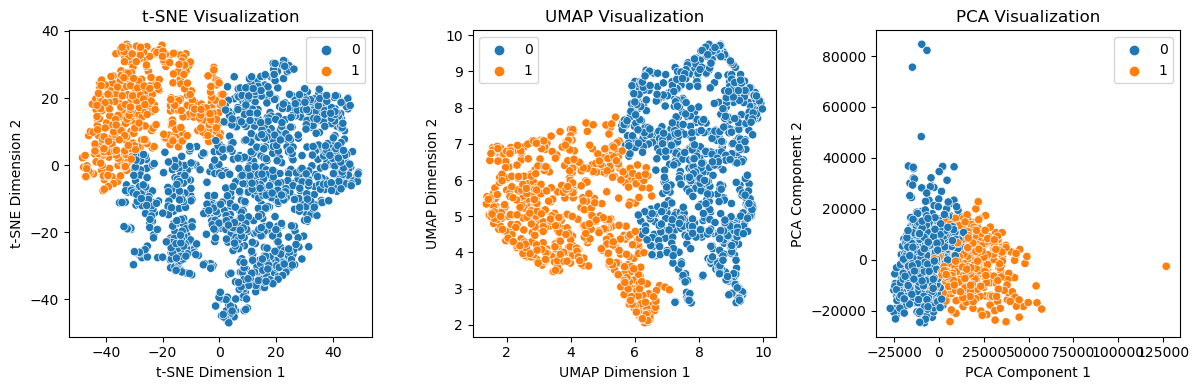

In [88]:
# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels_tsne, palette='tab10')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 3, 2)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=cluster_labels_umap, palette='tab10')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels_pca, palette='tab10')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [19]:
df = features.copy()

In [20]:
df['Cluster_pca'] = cluster_labels_pca # add as column the results obtained from clustering using pca

In [89]:
df['Cluster_umap'] = cluster_labels_umap # add as column the results obtained from clustering using t-SNE

In [22]:
df['Cluster_tsne'] = cluster_labels_tsne # add as column the results obtained from clustering using UMAP

In [23]:
df

,ENSG00000205542,ENSG00000198804,ENSG00000167996,ENSG00000198712,ENSG00000156508,ENSG00000087086,ENSG00000075624,ENSG00000229117,ENSG00000026025,ENSG00000140988,...,ENSG00000115241,ENSG00000136750,ENSG00000087191,ENSG00000177570,ENSG00000159593,ENSG00000075292,ENSG00000185565,Cluster_pca,Cluster_umap,Cluster_tsne
cell,,,,,,,,,,,,,,,,,,,,,
ERR2538859-AAACCTGAGACCACGA,32962.305,9065.20200,8240.5760,5350.2246,4735.2563,5042.7400,4950.4950,9255.0700,3659.0615,5749.6270,...,92.245255,0.000000,122.993670,61.496834,122.993670,61.496834,0.00000,1,1,1
ERR2538859-AAACCTGTCTGATACG,34861.200,0.00000,5579.0670,0.0000,16139.4430,4519.0444,3873.4666,12696.3620,3443.0813,7962.1255,...,215.192580,0.000000,0.000000,0.000000,215.192580,0.000000,0.00000,1,1,1
ERR2538859-AAACGGGAGTGTTGAA,17791.770,9193.14500,4845.0840,3431.0170,13334.9840,4739.7560,1061.1393,14643.7230,2193.0212,12343.2730,...,35.371310,0.000000,35.371310,106.783010,106.113940,70.742620,70.74262,0,0,0
ERR2538859-AAAGATGTCCGAACGC,26513.914,10016.36700,7070.3770,5564.6484,10540.0990,4058.9202,3404.2556,7725.0415,8837.9720,7200.7144,...,130.932900,0.000000,196.399350,65.466450,0.000000,130.932900,65.46645,0,1,0
ERR2538859-AAAGTAGGTTAGTGGG,30791.666,18116.04300,7291.2870,7347.3735,5664.7690,5384.3350,2636.0806,8469.1100,3140.8620,4935.0034,...,56.086823,0.000000,56.086823,70.470960,56.086823,0.000000,0.00000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERR2538860-TTTGGTTTCGTTACGA,20833.332,11986.30100,5707.7627,6849.3150,6563.9270,5707.7627,3139.2693,14554.7940,1141.5525,12557.0770,...,285.388120,570.776250,0.000000,0.000000,0.000000,285.388120,0.00000,0,1,0
ERR2538860-TTTGTCAAGCCCAACC,73876.350,172.20595,13776.4760,0.0000,5510.5903,9126.9150,18598.2420,10160.1510,7577.0615,7232.6500,...,172.205950,0.000000,172.205950,0.000000,0.000000,0.000000,0.00000,1,1,1
ERR2538860-TTTGTCACATTGGGCC,22690.557,14539.58000,3524.7466,4038.7722,10060.2140,2570.1277,3671.6110,8003.4385,6094.8745,8224.4080,...,293.728880,0.000000,220.296660,118.785430,73.432220,0.000000,0.00000,0,0,0


### t-SNE dimensionality results 

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [95]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(2)]

# Iterate over the rows using the iterrows() function
for index, row in df.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_tsne'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i+1}:", lst)

Indexes with Cluster_tsne value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAAGTAGGTTAGTGGG', 'ERR2538859-AACCATGAGGCTAGCA', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-AAGGCAGAGCTAACAA', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-ACTGCTCCATGCATGT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGAGTGGGTGGGTCAA', 'ERR2538859-AGCCGATAGAACAACT', 'ERR2538859-AGCTCCTTCTCCAGGG', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-AGTAGTCTCGTTGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGACACACCGAC', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATCATCTGTGCCTGTG', 'ERR2538859-ATCCACCGTAAGCACG', 'ERR2538859-ATCCACCGTCGGCACT', 'ERR2538859-ATGAGGGGTGAGCGAT', 'ERR2538859-CAAGAAATCTGTGCAA', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACTCGTTCCGTCT', 'ER

In [96]:
# Read the Excel file that contains the labels assigned to them by the authors clustering
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(1) 

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1


In [97]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(2)]

# Iterate over the columns
for column in first_two_rows.columns:
    # Check the values in the column
    values = first_two_rows[column].unique()
    for value in values:
        if value in range(1, 3):  
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACCTGAGACCACGA', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAAGTAGGTTAGTGGG', 'ERR2538859-AAATGCCAGACAGACC', 'ERR2538859-AACGTTGTCGATGAGG', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-AACTTTCGTAGCGTCC', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-AAGGCAGAGCTAACAA', 'ERR2538859-ACAAACTTCAACACTG', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACAGTTACATCGACGC', 'ERR2538859-ACATGATTCCTTTCTC', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCCACTGTTGCTCCT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGATACAGCCGTCGT', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGATGTAGTTAAGTG', 'ERR2538859-ACGCAACCACCAGTTA', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-ACTATCTGTCCGACGT', 'ERR2538859-ACTGCTCCATGCATGT', 'ERR2538859-ACTTGTTCATGCCTAA', 'ERR2538859-ACTTGTTTCTTGTACT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGAGTGGGTGGGTCAA', 'ERR2538859-AGCC

In [98]:
lists_by_value[1].pop(0)

'K'

### UMAP results 

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [90]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(2)]

# Iterate over the rows using the iterrows() function
for index, row in df.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_umap'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i+1}:", lst)

Indexes with Cluster_tsne value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AACCATGAGGCTAGCA', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGCCGATAGAACAACT', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-AGTAGTCTCGTTGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGACACACCGAC', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATCATCTGTGCCTGTG', 'ERR2538859-ATGAGGGGTGAGCGAT', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACTCGTTCCGTCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CAGAATCAGAAGATTC', 'ERR2538859-CATCAAGAGTGCCATT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CGCGGTAAGGAGCGTT', 'ERR2538859-CGCGTTTCATCGGACC', 'ERR2538859-CGTCACTCATATGAGA', 'ERR2538859-CTAGAGTTCACGCATA', 'ERR2538859-CTCATTAGTGTAATGA', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGAAGTAGCGTAGTG', 'ER

In [91]:
# Read the Excel file that contains the labels assigned to them by the authors clustering
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(1) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1


In [92]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(2)]

# Iterate over the columns
for column in first_two_rows.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = first_two_rows[column].unique()
    for value in values:
        if value in range(1, 3):  
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACCTGAGACCACGA', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAAGTAGGTTAGTGGG', 'ERR2538859-AAATGCCAGACAGACC', 'ERR2538859-AACGTTGTCGATGAGG', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-AACTTTCGTAGCGTCC', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-AAGGCAGAGCTAACAA', 'ERR2538859-ACAAACTTCAACACTG', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACAGTTACATCGACGC', 'ERR2538859-ACATGATTCCTTTCTC', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCCACTGTTGCTCCT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGATACAGCCGTCGT', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGATGTAGTTAAGTG', 'ERR2538859-ACGCAACCACCAGTTA', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-ACTATCTGTCCGACGT', 'ERR2538859-ACTGCTCCATGCATGT', 'ERR2538859-ACTTGTTCATGCCTAA', 'ERR2538859-ACTTGTTTCTTGTACT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGAGTGGGTGGGTCAA', 'ERR2538859-AGCC

In [93]:
lists_by_value[1].pop(0)

'K'

### PCA results

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [100]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(2)]

# Iterate over the rows using the iterrows() function
for index, row in df.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_pca'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i+1}:", lst)

Indexes with Cluster_tsne value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAATGCCAGACAGACC', 'ERR2538859-AACCATGAGGCTAGCA', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGCAACCACCAGTTA', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-ACTTGTTTCTTGTACT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGCCGATAGAACAACT', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-AGTAGTCTCGTTGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGACACACCGAC', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATCATCTGTGCCTGTG', 'ERR2538859-ATCCACCGTAAGCACG', 'ERR2538859-ATGAGGGGTGAGCGAT', 'ERR2538859-CAAGAAATCTGTGCAA', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACCTAGTGGGATC', 'ERR2538859-CACACTCGTTCCGTCT', 'ERR2538859-CACAGGCCATTCGACA', 'ERR2538859-CACAGGCTCTGTCTAT', 'ER

In [101]:
Read the Excel file that contains the labels assigned to them by the authors clustering
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(1) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1


In [102]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(2)]

# Iterate over the columns
for column in first_two_rows.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = first_two_rows[column].unique()
    for value in values:
        if value in range(1, 3):  
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACCTGAGACCACGA', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAAGTAGGTTAGTGGG', 'ERR2538859-AAATGCCAGACAGACC', 'ERR2538859-AACGTTGTCGATGAGG', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-AACTTTCGTAGCGTCC', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-AAGGCAGAGCTAACAA', 'ERR2538859-ACAAACTTCAACACTG', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACAGTTACATCGACGC', 'ERR2538859-ACATGATTCCTTTCTC', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCCACTGTTGCTCCT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGATACAGCCGTCGT', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGATGTAGTTAAGTG', 'ERR2538859-ACGCAACCACCAGTTA', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-ACTATCTGTCCGACGT', 'ERR2538859-ACTGCTCCATGCATGT', 'ERR2538859-ACTTGTTCATGCCTAA', 'ERR2538859-ACTTGTTTCTTGTACT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGAGTGGGTGGGTCAA', 'ERR2538859-AGCC

In [103]:
lists_by_value[1].pop(0)

'K'

## Clustering 11 classes

In [44]:
clustering = AgglomerativeClustering(n_clusters=11, linkage='ward') # initialize clustering approach

In [45]:
# Perform clustering across all different dimensionality reducted data
cluster_labels_pca_11 = clustering.fit_predict(pca_result)
cluster_labels_tsne_11 = clustering.fit_predict(tsne_result)
cluster_labels_umap_11 = clustering.fit_predict(umap_result)

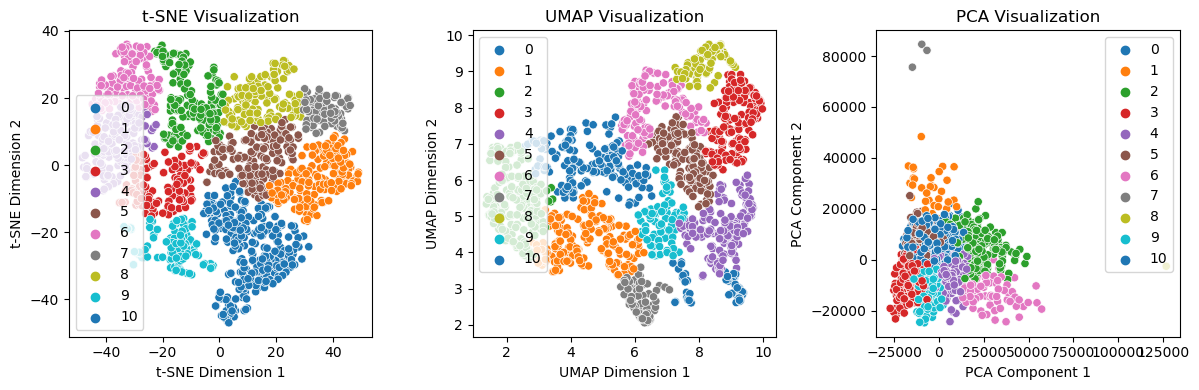

In [46]:
# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels_tsne_11, palette='tab10')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 3, 2)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=cluster_labels_umap_11, palette='tab10')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels_pca_11, palette='tab10')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [47]:
df_11 = features.copy()

In [48]:
# Assign the results obtained from each clustering as column to the DataFrame, containing the cells and their gene profiles
df_11['Cluster_pca'] = cluster_labels_pca_11
df_11['Cluster_umap'] = cluster_labels_umap_11
df_11['Cluster_tsne'] = cluster_labels_tsne_11

### t-SNE

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [55]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(11)]

# Iterate over the rows using the iterrows() function
for index, row in df_11.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_tsne'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CGCGGTAAGGAGCGTT', 'ERR2538859-CGTCACTCATATGAGA', 'ERR2538859-CTGAAGTAGCGTAGTG', 'ERR2538859-GATCGTAAGATTACCC', 'ERR2538859-GCGGGTCAGGACACCA', 'ERR2538859-GGAAAGCAGGCCGAAT', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGGAGTGTTGGGACA', 'ERR2538859-GTGAAGGCAAGTTGTC', 'ERR2538859-TAAGCGTAGACACTAA', 'ERR2538859-TCTGAGAAGGTGCTAG', 'ERR2538859-TTTATGCCACAGTCGC', 'ERR2538860-AAACCTGAGCTGTTCA', 'ERR2538860-AAAGTAGAGCTAGTGG', 'ERR2538860-AACCATGCACTACAGT', 'ERR2538860-AACTCAGTCTGTGCAA', 'ERR2538860-AACTTTCCAGGGTATG', 'ERR2538860-AAGCAGTGGTATCAAC', 'ERR2538860-AAGCCGCGTGGCTCCA', 'ERR2538860-AATCGGTGTACTCAAC', 'ERR2538860-ACAGCCGTCCTGTACC', 'ERR2538860-ACATCAGAGCGTAATA', 'ERR2538860-ACATGGTAGGTGCTTT', 'ERR2538860-ACCCACTCATGGAATA', 'ERR2538860-ACCGTAACAAAGCAAT', 'ERR2538860-ACCTTTAGTGGGTCAA', 'ERR2538860-ACCTTTATCTCGTATT', 'ER

In [56]:
# Read the Excel file
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(5) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3
2,False,7,3,6,1,5,4,4,6,4,...,2,1,5,3,1,5,6,2,2,3
3,False,8,3,7,1,5,6,5,7,5,...,2,1,4,3,1,4,7,2,2,3
4,True,11,2,7,1,10,5,9,7,9,...,4,1,3,2,8,3,7,4,6,2


In [57]:
# Extract the fourth row and assign the column names to it
fourth_row = first_two_rows.iloc[4:, :]
fourth_row.columns = first_two_rows.columns

In [58]:
fourth_row


,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
4,True,11,2,7,1,10,5,9,7,9,...,4,1,3,2,8,3,7,4,6,2


In [63]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(11)] # 12 for eleven

# Iterate over the columns
for column in fourth_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = fourth_row[column].unique()
    for value in values:
        if value in range(1, 12):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['sel.K', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGAATGGTACCCAAT', 'ERR2538859-GTCAAGTTCATGCATG', 'ERR2538859-TTATGCTAGGGCTCTC', 'ERR2538859-TTTGTCATCTTCATGT', 'ERR2538860-AAACCTGTCGGAGCAA', 'ERR2538860-AAAGATGAGGAGCGAG', 'ERR2538860-AAAGCAATCTATGTGG', 'ERR2538860-AAAGTAGAGCTAGTGG', 'ERR2538860-AACCATGAGAAGGTTT', 'ERR2538860-AACGTTGGTTTGGGCC', 'ERR2538860-AACGTTGTCACGAAGG', 'ERR2538860-AACTCAGTCTGTGCAA', 'ERR2538860-AACTTTCCAAGTAATG', 'ERR2538860-AACTTTCCAGGGTATG', 'ERR2538860-AACTTTCCAGGGTTAG', 'ERR2538860-AAGACCTGTCTGGAGA', 'ERR2538860-AAGCAGTGGTATCAAC', 'ERR2538860-AAGCCGCTCTGGCGTG', 'ERR2538860-ACACTGAAGTTAAGTG', 'ERR2538860-ACAGCTAGTAGTAGTA', 'ERR2538860-ACATACGAGAGCAATT', 'ERR2538860-ACATCAGAGCGTAATA', 'ERR253

In [ ]:
lists_by_value[0].pop(0)

In [ ]:
lists_by_value[10].pop(0)

### UMAP

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [129]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(11)]

# Iterate over the rows using the iterrows() function
for index, row in df_11.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_umap'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-AAACCTGTCTGATACG', 'ERR2538859-ACACCGGAGCACCGCT', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ATGAGGGCACATTCGA', 'ERR2538859-CCCAGTTGTTCCTCCA', 'ERR2538859-CCTCAGTCAGGGTTAG', 'ERR2538859-GAATGAATCGCATGAT', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGCCGATCAATCGGTT', 'ERR2538859-GGTGAAGGTCCAAGTT', 'ERR2538859-GTCACGGAGTGTCCAT', 'ERR2538859-TACTCGCTCGCACTCT', 'ERR2538859-TGGTTCCAGACAGGCT', 'ERR2538859-TTGAACGAGTGAACAT', 'ERR2538859-TTGTAGGAGGGCACTA', 'ERR2538860-AAACCTGTCGGAGCAA', 'ERR2538860-AAACGGGCACGTTGGC', 'ERR2538860-AAAGATGAGGAGCGAG', 'ERR2538860-AACACGTGTCAGCTAT', 'ERR2538860-AACCATGCAGGCTGAA', 'ERR2538860-AACCATGTCAACGAAA', 'ERR2538860-AACGTTGAGGTTACCT', 'ERR2538860-AACTCAGGTAGCAAAT', 'ERR2538860-AACTCCCAGACATAAC', 'ERR2538860-AACTTTCCAAGTAATG', 'ERR2538860-ACACCAAAGCATCATC', 'ERR2538860-ACACTGAAGTTAAGTG', 'ERR2538860-ACACTGACACATAACC', 'ERR2538860-ACACTGATCTAAGCCA', 'ERR2538860-ACAGCCGCATCCCACT', 'ERR2538860-ACAGCCGTCCGCAGTG', 'ER

In [124]:
# Read the Excel file
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(5) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3
2,False,7,3,6,1,5,4,4,6,4,...,2,1,5,3,1,5,6,2,2,3
3,False,8,3,7,1,5,6,5,7,5,...,2,1,4,3,1,4,7,2,2,3
4,True,11,2,7,1,10,5,9,7,9,...,4,1,3,2,8,3,7,4,6,2


In [125]:
# Extract the fourth row and assign the column names to it
fourth_row = first_two_rows.iloc[4:, :]
fourth_row.columns = first_two_rows.columns

In [126]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(11)] # 12 for eleven

# Iterate over the columns
for column in fourth_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = fourth_row[column].unique()
    for value in values:
        if value in range(1, 12):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['sel.K', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGAATGGTACCCAAT', 'ERR2538859-GTCAAGTTCATGCATG', 'ERR2538859-TTATGCTAGGGCTCTC', 'ERR2538859-TTTGTCATCTTCATGT', 'ERR2538860-AAACCTGTCGGAGCAA', 'ERR2538860-AAAGATGAGGAGCGAG', 'ERR2538860-AAAGCAATCTATGTGG', 'ERR2538860-AAAGTAGAGCTAGTGG', 'ERR2538860-AACCATGAGAAGGTTT', 'ERR2538860-AACGTTGGTTTGGGCC', 'ERR2538860-AACGTTGTCACGAAGG', 'ERR2538860-AACTCAGTCTGTGCAA', 'ERR2538860-AACTTTCCAAGTAATG', 'ERR2538860-AACTTTCCAGGGTATG', 'ERR2538860-AACTTTCCAGGGTTAG', 'ERR2538860-AAGACCTGTCTGGAGA', 'ERR2538860-AAGCAGTGGTATCAAC', 'ERR2538860-AAGCCGCTCTGGCGTG', 'ERR2538860-ACACTGAAGTTAAGTG', 'ERR2538860-ACAGCTAGTAGTAGTA', 'ERR2538860-ACATACGAGAGCAATT', 'ERR2538860-ACATCAGAGCGTAATA', 'ERR253

In [128]:
lists_by_value[10].pop(0)

'K'

### PCA

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [131]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(11)]

# Iterate over the rows using the iterrows() function
for index, row in df_11.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_pca'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(11):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-AAAGATGTCCGAACGC', 'ERR2538859-AAATGCCAGACAGACC', 'ERR2538859-AACTCAGAGGCCGAAT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-ACAGCTAGTTCGTTGA', 'ERR2538859-ACATGTAGTCGACTAT', 'ERR2538859-ACCTTTAAGACAAAGG', 'ERR2538859-ACGCAACCACCAGTTA', 'ERR2538859-ACTTGTTTCTTGTACT', 'ERR2538859-AGCCGATAGAACAACT', 'ERR2538859-ATCCACCGTAAGCACG', 'ERR2538859-CAAGAAATCTGTGCAA', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACCTAGTGGGATC', 'ERR2538859-CACACTCGTTCCGTCT', 'ERR2538859-CACAGGCCATTCGACA', 'ERR2538859-CACATAGAGGTAAACT', 'ERR2538859-CAGAATCAGAAGATTC', 'ERR2538859-CAGCAGCCAATGTTGC', 'ERR2538859-CATCAAGAGTGCCATT', 'ERR2538859-CATGCCTTCACAACGT', 'ERR2538859-CCCTCCTCAATCACAC', 'ERR2538859-CCTACACTCTCCGGTT', 'ERR2538859-CGCGGTAAGGAGCGTT', 'ERR2538859-CGCTTCATCATAAAGG', 'ERR2538859-CGTCACTCATATGAGA', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGATAGGTAAGTTCC', 'ERR2538859-GAACCTACAGTCACTA', 'ERR2538859-GAATGCCAGACAGACC', 'ERR2538859-GACGTGCAGATGTGTA', 'ER

In [132]:
# Read the Excel file
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(5) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3
2,False,7,3,6,1,5,4,4,6,4,...,2,1,5,3,1,5,6,2,2,3
3,False,8,3,7,1,5,6,5,7,5,...,2,1,4,3,1,4,7,2,2,3
4,True,11,2,7,1,10,5,9,7,9,...,4,1,3,2,8,3,7,4,6,2


In [133]:
# Extract the fourth row and assign the column names to it
fourth_row = first_two_rows.iloc[4:, :]
fourth_row.columns = first_two_rows.columns

In [134]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(11)] # 12 for eleven

# Iterate over the columns
for column in fourth_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = fourth_row[column].unique()
    for value in values:
        if value in range(1, 12):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['sel.K', 'ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGAATGGTACCCAAT', 'ERR2538859-GTCAAGTTCATGCATG', 'ERR2538859-TTATGCTAGGGCTCTC', 'ERR2538859-TTTGTCATCTTCATGT', 'ERR2538860-AAACCTGTCGGAGCAA', 'ERR2538860-AAAGATGAGGAGCGAG', 'ERR2538860-AAAGCAATCTATGTGG', 'ERR2538860-AAAGTAGAGCTAGTGG', 'ERR2538860-AACCATGAGAAGGTTT', 'ERR2538860-AACGTTGGTTTGGGCC', 'ERR2538860-AACGTTGTCACGAAGG', 'ERR2538860-AACTCAGTCTGTGCAA', 'ERR2538860-AACTTTCCAAGTAATG', 'ERR2538860-AACTTTCCAGGGTATG', 'ERR2538860-AACTTTCCAGGGTTAG', 'ERR2538860-AAGACCTGTCTGGAGA', 'ERR2538860-AAGCAGTGGTATCAAC', 'ERR2538860-AAGCCGCTCTGGCGTG', 'ERR2538860-ACACTGAAGTTAAGTG', 'ERR2538860-ACAGCTAGTAGTAGTA', 'ERR2538860-ACATACGAGAGCAATT', 'ERR2538860-ACATCAGAGCGTAATA', 'ERR253

In [138]:
lists_by_value[0].pop(0)

'sel.K'

In [139]:
lists_by_value[10].pop(0)

'K'

## Clustering 4 clusters

In [65]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward') # initialize the clustering approach

In [66]:
# Perform clustering using all the dimensionality reducted data
cluster_labels_pca_4 = clustering.fit_predict(pca_result)
cluster_labels_tsne_4 = clustering.fit_predict(tsne_result)
cluster_labels_umap_4 = clustering.fit_predict(umap_result)

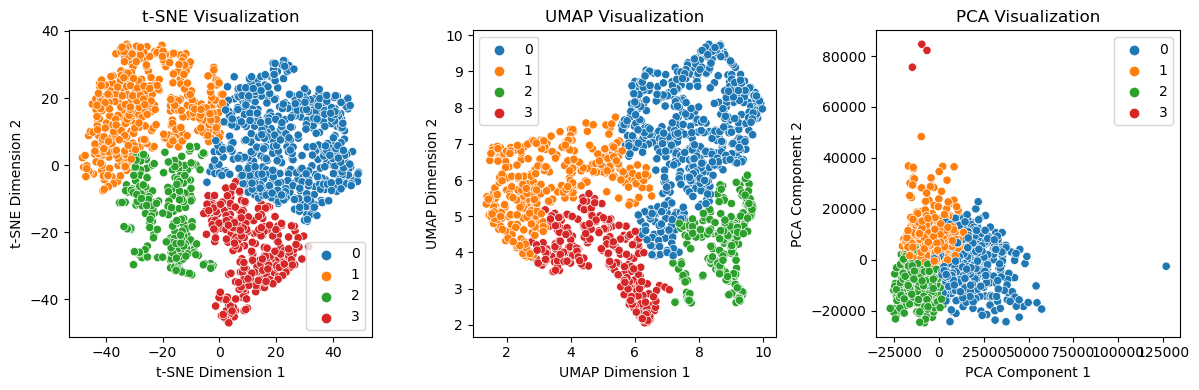

In [105]:
# Visualize the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=cluster_labels_tsne_4, palette='tab10')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

plt.subplot(1, 3, 2)
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=cluster_labels_umap_4, palette='tab10')
plt.title('UMAP Visualization')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.subplot(1, 3, 3)
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cluster_labels_pca_4, palette='tab10')
plt.title('PCA Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()

In [68]:
df_4 = features.copy()

In [69]:
df_4['Cluster_pca'] = cluster_labels_pca_4
df_4['Cluster_umap'] = cluster_labels_umap_4
df_4['Cluster_tsne'] = cluster_labels_tsne_4

### t-SNE

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [106]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(4)]

# Iterate over the rows using the iterrows() function
for index, row in df_4.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_tsne'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(4):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AACCATGAGGCTAGCA', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGTAGTCTCGTTGACA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGACACACCGAC', 'ERR2538859-ATCATCTGTGCCTGTG', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACTCGTTCCGTCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CAGAATCAGAAGATTC', 'ERR2538859-CATCAAGAGTGCCATT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CCTCAGTCAGGGTTAG', 'ERR2538859-CGCGTTTCATCGGACC', 'ERR2538859-CTAGAGTTCACGCATA', 'ERR2538859-CTCATTAGTGTAATGA', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTGATAGGTAAGTTCC', 'ERR2538859-CTGTGCTAGCGACGTA', 'ERR2538859-GAACCTAAGAACAACT', 'ERR2538859-GACGTGCAGATGTGTA', 'ERR2538859-GACGTTACAAGCGAGT', 'ERR2538859-GACGTTAGTACCCAAT', 'ERR2538859-GACTAACCACTTAAGC', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCACATATCCGTTGCT', 'ERR2538859-GGACGTCTCTACGAGT', 'ERR2538859-GGAGCAACAGTATAAG', 'ERR2538859-GGCAATTGTTGACGTT', 'ER

In [107]:
# Read the Excel file
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(2) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3


In [108]:
# Extract the fourth row and assign the column names to it
second_row = first_two_rows.iloc[1:, :]
second_row.columns = first_two_rows.columns

In [75]:
second_row

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3


In [109]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(4)] 

# Iterate over the columns
for column in second_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = second_row[column].unique()
    for value in values:
        if value in range(1, 5):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATGAGGGCACATTCGA', 'ERR2538859-CACACCTAGGCCGAAT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCCAGTTAGTAGCGGT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CCTCAGTCAGGGTTAG', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CGCTTCATCATAAAGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGAAGTAGCGTAGTG', 'ERR2538859-GAACCTAAGAACAACT', 'ERR2538859-GACGTTACAAGCGAGT', 'ERR2538859-GACTAACCACTTAAGC', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCGACCAGTTTGCATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGAAAGCAGGCCGAAT', 'ERR2538859-GGACAAGCAAGAAGAG', 'ERR2538859-GGACGTCTCTACGAGT', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGA

In [110]:
lists_by_value[3].pop(0)

'K'

### UMAP

In this particular section, the cells are categorised into lists according to the clustering label that has been assigned to them. Subsequently, we replicate the aforementioned procedures in accordance with the outcomes presented by the authors. Once the lists have been generated, it is necessary to navigate to the relevant subsection within the Comparison of Results section. Afterwards, the code should be executed to facilitate the comparison process and ascertain the degree of similarity among the results.

In [112]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(4)]

# Iterate over the rows using the iterrows() function
for index, row in df_4.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_umap'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(4):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AACCATGAGGCTAGCA', 'ERR2538859-ACACATATCCGTTGCT', 'ERR2538859-ACACCAAGTGTGAATA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGCCGATAGAACAACT', 'ERR2538859-AGTAGTCTCGTTGACA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGACACACCGAC', 'ERR2538859-ATCATCTGTGCCTGTG', 'ERR2538859-CACAAACCAGGCGATA', 'ERR2538859-CACACTCGTTCCGTCT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CAGAATCAGAAGATTC', 'ERR2538859-CATCAAGAGTGCCATT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CGCGTTTCATCGGACC', 'ERR2538859-CTAGAGTTCACGCATA', 'ERR2538859-CTCATTAGTGTAATGA', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGATAGGTAAGTTCC', 'ERR2538859-CTGTGCTAGCGACGTA', 'ERR2538859-GAACCTAAGAACAACT', 'ERR2538859-GACGTGCAGATGTGTA', 'ERR2538859-GACGTTACAAGCGAGT', 'ERR2538859-GACTAACCACTTAAGC', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCACATATCCGTTGCT', 'ERR2538859-GCACCAAGTGTGAATA', 'ERR2538859-GGACGTCTCTACGAGT', 'ER

In [113]:
# Read the Excel file
truth = pd.read_excel('content/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(2) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3


In [ ]:
# Extract the fourth row and assign the column names to it
second_row = first_two_rows.iloc[1:, :]
second_row.columns = first_two_rows.columns

In [114]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(4)] 

# Iterate over the columns
for column in second_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = second_row[column].unique()
    for value in values:
        if value in range(1, 5):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATGAGGGCACATTCGA', 'ERR2538859-CACACCTAGGCCGAAT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCCAGTTAGTAGCGGT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CCTCAGTCAGGGTTAG', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CGCTTCATCATAAAGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGAAGTAGCGTAGTG', 'ERR2538859-GAACCTAAGAACAACT', 'ERR2538859-GACGTTACAAGCGAGT', 'ERR2538859-GACTAACCACTTAAGC', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCGACCAGTTTGCATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGAAAGCAGGCCGAAT', 'ERR2538859-GGACAAGCAAGAAGAG', 'ERR2538859-GGACGTCTCTACGAGT', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGA

In [115]:
lists_by_value[3].pop(0)

'K'

### PCA

In [117]:
# Create empty lists to store the index values for each category
lists_by_category = [[] for _ in range(4)]

# Iterate over the rows using the iterrows() function
for index, row in df_4.iterrows():
    # Get the value of the 'Cluster_tsne' column for the current row
    category_value = int(row['Cluster_pca'])
    
    # Append the index to the corresponding list based on the value of 'Cluster_tsne'
    if category_value in range(4):  # Assuming categories range from 0 to 10
        lists_by_category[category_value].append(index)

# Print the lists of index values for each category
for i, lst in enumerate(lists_by_category):
    print(f"Indexes with Cluster_tsne value {i}:", lst)

Indexes with Cluster_tsne value 0: ['ERR2538859-AAACCTGAGACCACGA', 'ERR2538859-AAACCTGTCTGATACG', 'ERR2538859-AAAGTAGGTTAGTGGG', 'ERR2538859-AACGTTGTCGATGAGG', 'ERR2538859-AACTTTCGTAGCGTCC', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-AAGGCAGAGCTAACAA', 'ERR2538859-ACAAACTTCAACACTG', 'ERR2538859-ACACCGGAGCACCGCT', 'ERR2538859-ACAGTTACATCGACGC', 'ERR2538859-ACATGATTCCTTTCTC', 'ERR2538859-ACCCACTGTTGCTCCT', 'ERR2538859-ACGATACAGCCGTCGT', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGATGTAGTTAAGTG', 'ERR2538859-ACGGGCTTCAGCTCGG', 'ERR2538859-ACTATCTGTCCGACGT', 'ERR2538859-ACTGCTCCATGCATGT', 'ERR2538859-ACTTGTTCATGCCTAA', 'ERR2538859-AGAGTGGGTGGGTCAA', 'ERR2538859-AGCTCCTCAGTTAACC', 'ERR2538859-AGCTCCTTCTCCAGGG', 'ERR2538859-AGGCCGTGTATAGGTA', 'ERR2538859-AGGCCGTTCACCCGAG', 'ERR2538859-AGGTCCGGTTCCCGAG', 'ERR2538859-AGTTGGTAGTGAAGTT', 'ERR2538859-ATAAGAGCAAATTGCC', 'ERR2538859-ATCACGACACGTAAGG', 'ERR2538859-ATCCACCAGGAGTTGC', 'ERR2538859-ATCCACCGTCGGCACT', 'ERR2538859-ATCCGAACAAGTTAAG', 'ER

In [119]:
# Read the Excel file
truth = pd.read_excel('C:/Users/maria/Desktop/DSIT/Spring_semester/ML in Comp. Biology/Project/data/ground_truth.xlsx', header=0)

# Extract the first two rows
first_two_rows = truth.head(2) # 5for foourth row

# Display the extracted rows
first_two_rows

,sel.K,K,ERR2538859-AAACCTGAGACCACGA,ERR2538859-AAACCTGTCTGATACG,ERR2538859-AAACGGGAGTGTTGAA,ERR2538859-AAAGATGTCCGAACGC,ERR2538859-AAAGTAGGTTAGTGGG,ERR2538859-AAATGCCAGACAGACC,ERR2538859-AACCATGAGGCTAGCA,ERR2538859-AACGTTGTCGATGAGG,...,ERR2538860-TTTGCGCTCCACTCCA,ERR2538860-TTTGCGCTCGGTGTCG,ERR2538860-TTTGCGCTCTGCGTAA,ERR2538860-TTTGGTTCAGTGACAG,ERR2538860-TTTGGTTGTTCCAACA,ERR2538860-TTTGGTTTCGTTACGA,ERR2538860-TTTGTCAAGCCCAACC,ERR2538860-TTTGTCACATTGGGCC,ERR2538860-TTTGTCAGTTGCGTTA,ERR2538860-TTTGTCATCAACACCA
0,False,2,1,2,1,1,1,1,2,1,...,1,1,1,1,1,1,2,1,1,1
1,False,4,3,2,1,4,4,4,2,4,...,1,1,2,3,1,2,2,1,1,3


In [120]:
# Extract the fourth row and assign the column names to it
second_row = first_two_rows.iloc[1:, :]
second_row.columns = first_two_rows.columns

In [121]:
# Initialize lists to store column names based on values
lists_by_value = [[] for _ in range(4)] 

# Iterate over the columns
for column in second_row.columns:
    # Check the values in the column
    #values = fourth_row[column].unique() # gia 11
    values = second_row[column].unique()
    for value in values:
        if value in range(1, 5):  # Assuming values range from 1 to 11, 12 gia 11
            lists_by_value[value-1].append(column)

# Print the lists of column names for each value
for i, lst in enumerate(lists_by_value):
    print(f"Columns with value {i+1}:", lst)

Columns with value 1: ['ERR2538859-AAACGGGAGTGTTGAA', 'ERR2538859-AAGACCTCATATGGTC', 'ERR2538859-ACAGCCGGTCTAGCCG', 'ERR2538859-ACGATACTCAGGATCT', 'ERR2538859-ACGGGTCAGGACACCA', 'ERR2538859-AGAGTGGCAGTATGCT', 'ERR2538859-AGGGAGTGTTGGGACA', 'ERR2538859-ATAAGAGTCTCTAGGA', 'ERR2538859-ATAGACCCACGACTCG', 'ERR2538859-ATCACGAGTCTTTCAT', 'ERR2538859-ATGAGGGCACATTCGA', 'ERR2538859-CACACCTAGGCCGAAT', 'ERR2538859-CACAGGCTCTGTCTAT', 'ERR2538859-CCCAGTTAGTAGCGGT', 'ERR2538859-CCTACACGTCCTCCAT', 'ERR2538859-CCTCAGTCAGGGTTAG', 'ERR2538859-CGAGCACAGTGTACGG', 'ERR2538859-CGCTTCATCATAAAGG', 'ERR2538859-CTCGTCAGTTGCTCCT', 'ERR2538859-CTCTAATGTGCCTTGG', 'ERR2538859-CTGAAGTAGCGTAGTG', 'ERR2538859-GAACCTAAGAACAACT', 'ERR2538859-GACGTTACAAGCGAGT', 'ERR2538859-GACTAACCACTTAAGC', 'ERR2538859-GATCGTACAATGAATG', 'ERR2538859-GCGACCAGTTTGCATG', 'ERR2538859-GCTCCTAGTAGGCTGA', 'ERR2538859-GGAAAGCAGGCCGAAT', 'ERR2538859-GGACAAGCAAGAAGAG', 'ERR2538859-GGACGTCTCTACGAGT', 'ERR2538859-GGCTCGAGTTACAGAA', 'ERR2538859-GGGA

In [122]:
lists_by_value[3].pop(0)

'K'

# Compare the results

## 2 classes

### t-SNE

In [99]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 988 out of 1332
Number of common elements in lists 2: 71 out of 95


### UMAP

In [94]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 786 out of 1332
Number of common elements in lists 2: 74 out of 95


### PCA

In [104]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 956 out of 1332
Number of common elements in lists 2: 74 out of 95


## 4 clusters

### t-SNE

In [111]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 286 out of 655
Number of common elements in lists 2: 142 out of 270
Number of common elements in lists 3: 24 out of 269
Number of common elements in lists 4: 4 out of 233


### UMAP

In [116]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 332 out of 655
Number of common elements in lists 2: 130 out of 270
Number of common elements in lists 3: 50 out of 269
Number of common elements in lists 4: 139 out of 233


### PCA

In [123]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 144 out of 655
Number of common elements in lists 2: 46 out of 270
Number of common elements in lists 3: 88 out of 269
Number of common elements in lists 4: 0 out of 233


## 11 clusters

### t-SNE

In [64]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 30 out of 281
Number of common elements in lists 2: 51 out of 243
Number of common elements in lists 3: 17 out of 168
Number of common elements in lists 4: 1 out of 145
Number of common elements in lists 5: 3 out of 117
Number of common elements in lists 6: 11 out of 110
Number of common elements in lists 7: 29 out of 108
Number of common elements in lists 8: 3 out of 96
Number of common elements in lists 9: 0 out of 84
Number of common elements in lists 10: 7 out of 38
Number of common elements in lists 11: 2 out of 39


### UMAP

In [130]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 32 out of 281
Number of common elements in lists 2: 35 out of 243
Number of common elements in lists 3: 33 out of 168
Number of common elements in lists 4: 20 out of 145
Number of common elements in lists 5: 1 out of 117
Number of common elements in lists 6: 15 out of 110
Number of common elements in lists 7: 9 out of 108
Number of common elements in lists 8: 0 out of 96
Number of common elements in lists 9: 0 out of 84
Number of common elements in lists 10: 6 out of 38
Number of common elements in lists 11: 27 out of 38


### PCA

In [140]:
# Assuming lists_by_value and lists_by_category have the same length
common_counts = []  # List to store the counts of common elements

for i, (list_value, list_category) in enumerate(zip(lists_by_value, lists_by_category)):
    common_elements = set(list_value) & set(list_category)
    common_counts.append(len(common_elements))

    # Print the counts of common elements
    print(f"Number of common elements in lists {i+1}: {len(common_elements)} out of {len(list_value)}")

Number of common elements in lists 1: 42 out of 280
Number of common elements in lists 2: 1 out of 243
Number of common elements in lists 3: 35 out of 168
Number of common elements in lists 4: 24 out of 145
Number of common elements in lists 5: 20 out of 117
Number of common elements in lists 6: 3 out of 110
Number of common elements in lists 7: 41 out of 108
Number of common elements in lists 8: 0 out of 96
Number of common elements in lists 9: 0 out of 84
Number of common elements in lists 10: 0 out of 38
Number of common elements in lists 11: 0 out of 38
